# LDA and QDA

In [1]:
import os
os.chdir("..")
from src.pretraitement import X_train,X_train_scaled,Y_train,X_test,X_test_scaled,Y_test

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'name_of_attack']
Nombre de colonne : 42
{'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf'

In [2]:
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [3]:
import numpy as np
import pandas as pd

In [4]:
def training_model(model,data,labels):
    clf = model()
    clf.fit(data,labels)
    return clf

def ratio_precision(Y_predicted,Y):
    if not(Y_predicted.shape == Y.shape):
        raise ValueError("Y_predicted and Y did not have the same shape")
    
    return (Y_predicted == Y).sum()/Y.shape[0]

def validation_model(clf,data_test,labels_test):
    Y_predicted = clf.predict(data_test)
    return ratio_precision(Y_predicted,labels_test),Y_predicted

## LDA

In [5]:
clf_lda = training_model(LinearDiscriminantAnalysis,X_train,Y_train)

In [6]:
validation_model(clf_lda,X_test,Y_test)[0]

0.9910936582798615

In [10]:
Y_test.unique()

array(['attack', 'normal'], dtype=object)

In [14]:
mask_attack = (Y_test=="attack")
mask_normal = (Y_test=="normal")

In [21]:
Y_test[mask_attack].shape[0]/Y_test.shape[0]

0.8028459810132987

In [15]:
validation_model(clf_lda,X_test[mask_attack],Y_test[mask_attack])[0],

0.9911756548924691

In [17]:
validation_model(clf_lda,X_test[mask_normal],Y_test[mask_normal])[0]

0.9907597535934292

## QDA

In [67]:
clf_qda = training_model(QuadraticDiscriminantAnalysis,X_train,Y_train)

/home/samsja/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [89]:
validation_model(clf_qda,X_test,Y_test)[0]

0.4117158876991276

In [114]:
clf_qda2 = training_model(QuadraticDiscriminantAnalysis,X_train_scaled,Y_train)

/home/samsja/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [115]:
validation_model(clf_qda2,X_test_scaled,Y_test)[0]

0.41914458636115215

In [103]:
corr = (X_train_scaled.cov()).to_numpy()

In [111]:
corr[(corr>=0.5)*(corr<1)]

array([0.83887348, 0.77824625, 0.52695253, 0.83224116, 0.70779306,
       0.70779306, 0.83887348, 0.92560852, 0.92810251, 0.66096976,
       0.62201795, 0.61809532, 0.95188715, 0.52889071, 0.92810251,
       0.67167478, 0.68800785, 0.68786031, 0.8940425 , 0.52889071,
       0.81786961, 0.66096976, 0.67167478, 0.95350396, 0.9499316 ,
       0.66516102, 0.58333422, 0.5861537 , 0.79649325, 0.99857383,
       0.96426209, 0.62201795, 0.68800785, 0.95350396, 0.99105096,
       0.64195535, 0.52695253, 0.5861537 , 0.5955957 , 0.58506431,
       0.5276451 , 0.5276451 , 0.58333422, 0.61809532, 0.68786031,
       0.9499316 , 0.99105096, 0.63620904, 0.77824625, 0.92560852,
       0.83224116, 0.81786961, 0.79649325, 0.5955957 , 0.79558401,
       0.96426209, 0.99857383, 0.58506431, 0.79558401, 0.95188715,
       0.8940425 , 0.66516102, 0.64195535, 0.63620904])

## Gaussian naive

In [121]:
clf_gnb = training_model(GaussianNB,X_train,Y_train)

In [122]:
validation_model(clf_gnb,X_test,Y_test)[0]

0.9141550108293018

## Diminution reduction before applying methods

In [8]:
from eim import eim_vectorial_optim

In [9]:
Z = X_train_scaled.to_numpy()

In [10]:
Z = Z.reshape(Z.shape[0],Z.shape[1],1)

In [11]:
ev = eim_vectorial_optim(Z,from_numpy = True)

3.3507207383512903 error in 0.9712152481079102 s :   0%|          | 101/444618 [01:14<90:35:50,  1.36it/s] 

 we have a 101-kolmogorov-width with a final error of 1.1368683772161603e-13, dimensionality reduction : 0.9997728387064851  


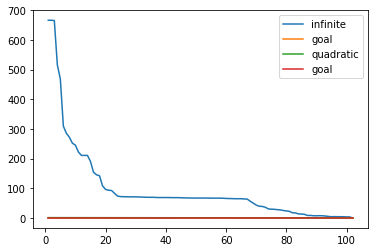

In [12]:
ev.reach_precision()

210.8572968241041 error in 0.5306251049041748 s :   0%|          | 14/444618 [00:07<64:17:46,  1.92it/s] 

 we have a 14-kolmogorov-width with a final error of 190.5141954019877, dimensionality reduction : 0.9999685122959484  


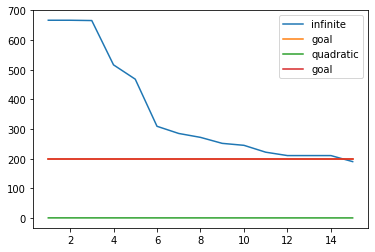

In [15]:
ev.reach_precision(epsilon=200)

In [17]:
data_train = ev.compute_alpha(ev.m,ev.Z).numpy().T

In [18]:
data_train.shape

(444618, 14)

In [19]:
X_train.shape

(444618, 107)

In [22]:
Z_test = X_test_scaled.to_numpy()
Z_test = Z_test.reshape(Z_test.shape[0],Z_test.shape[1],1)

In [27]:
import torch

In [31]:
data_test = ev.compute_alpha(ev.m,torch.from_numpy(Z_test)).numpy().T

## QDA

In [38]:
clf_qda_reduct = training_model(QuadraticDiscriminantAnalysis,data_train,Y_train)

/home/samsja/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [39]:
validation_model(clf_qda_reduct,data_test,Y_test)[0]

0.8029471894419368

### LDA

In [37]:
clf_lda_reduct = training_model(LinearDiscriminantAnalysis,data_train,Y_train)

In [36]:
validation_model(clf_lda_reduct,data_test,Y_test)[0]

0.8029471894419368

In [41]:
Y_predicted_1 = clf_lda_reduct.predict(data_test)
Y_predicted_2 = clf_qda_reduct.predict(data_test)

In [45]:
ratio_precision(Y_predicted_1,Y_predicted_2)

0.9998785498856345